# Midterm: Regression on Ames Housing Dataset
## Demetrios Lambropoulos


## Part 0 - Setup

In [0]:
# Import important library
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
# Import API to split dataset
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Import library to compute cross validation scores
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [0]:
# Load Ames dataset
df = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')

In [0]:
# Examine dataframe
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,eme,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,eme,eme,eme,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,eme,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,eme,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,eme,MnPrv,eme,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,eme,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,eme,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,eme,eme,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,eme,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,eme,eme,eme,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,eme,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,eme,MnPrv,eme,0,3,2010,WD,Normal,189900


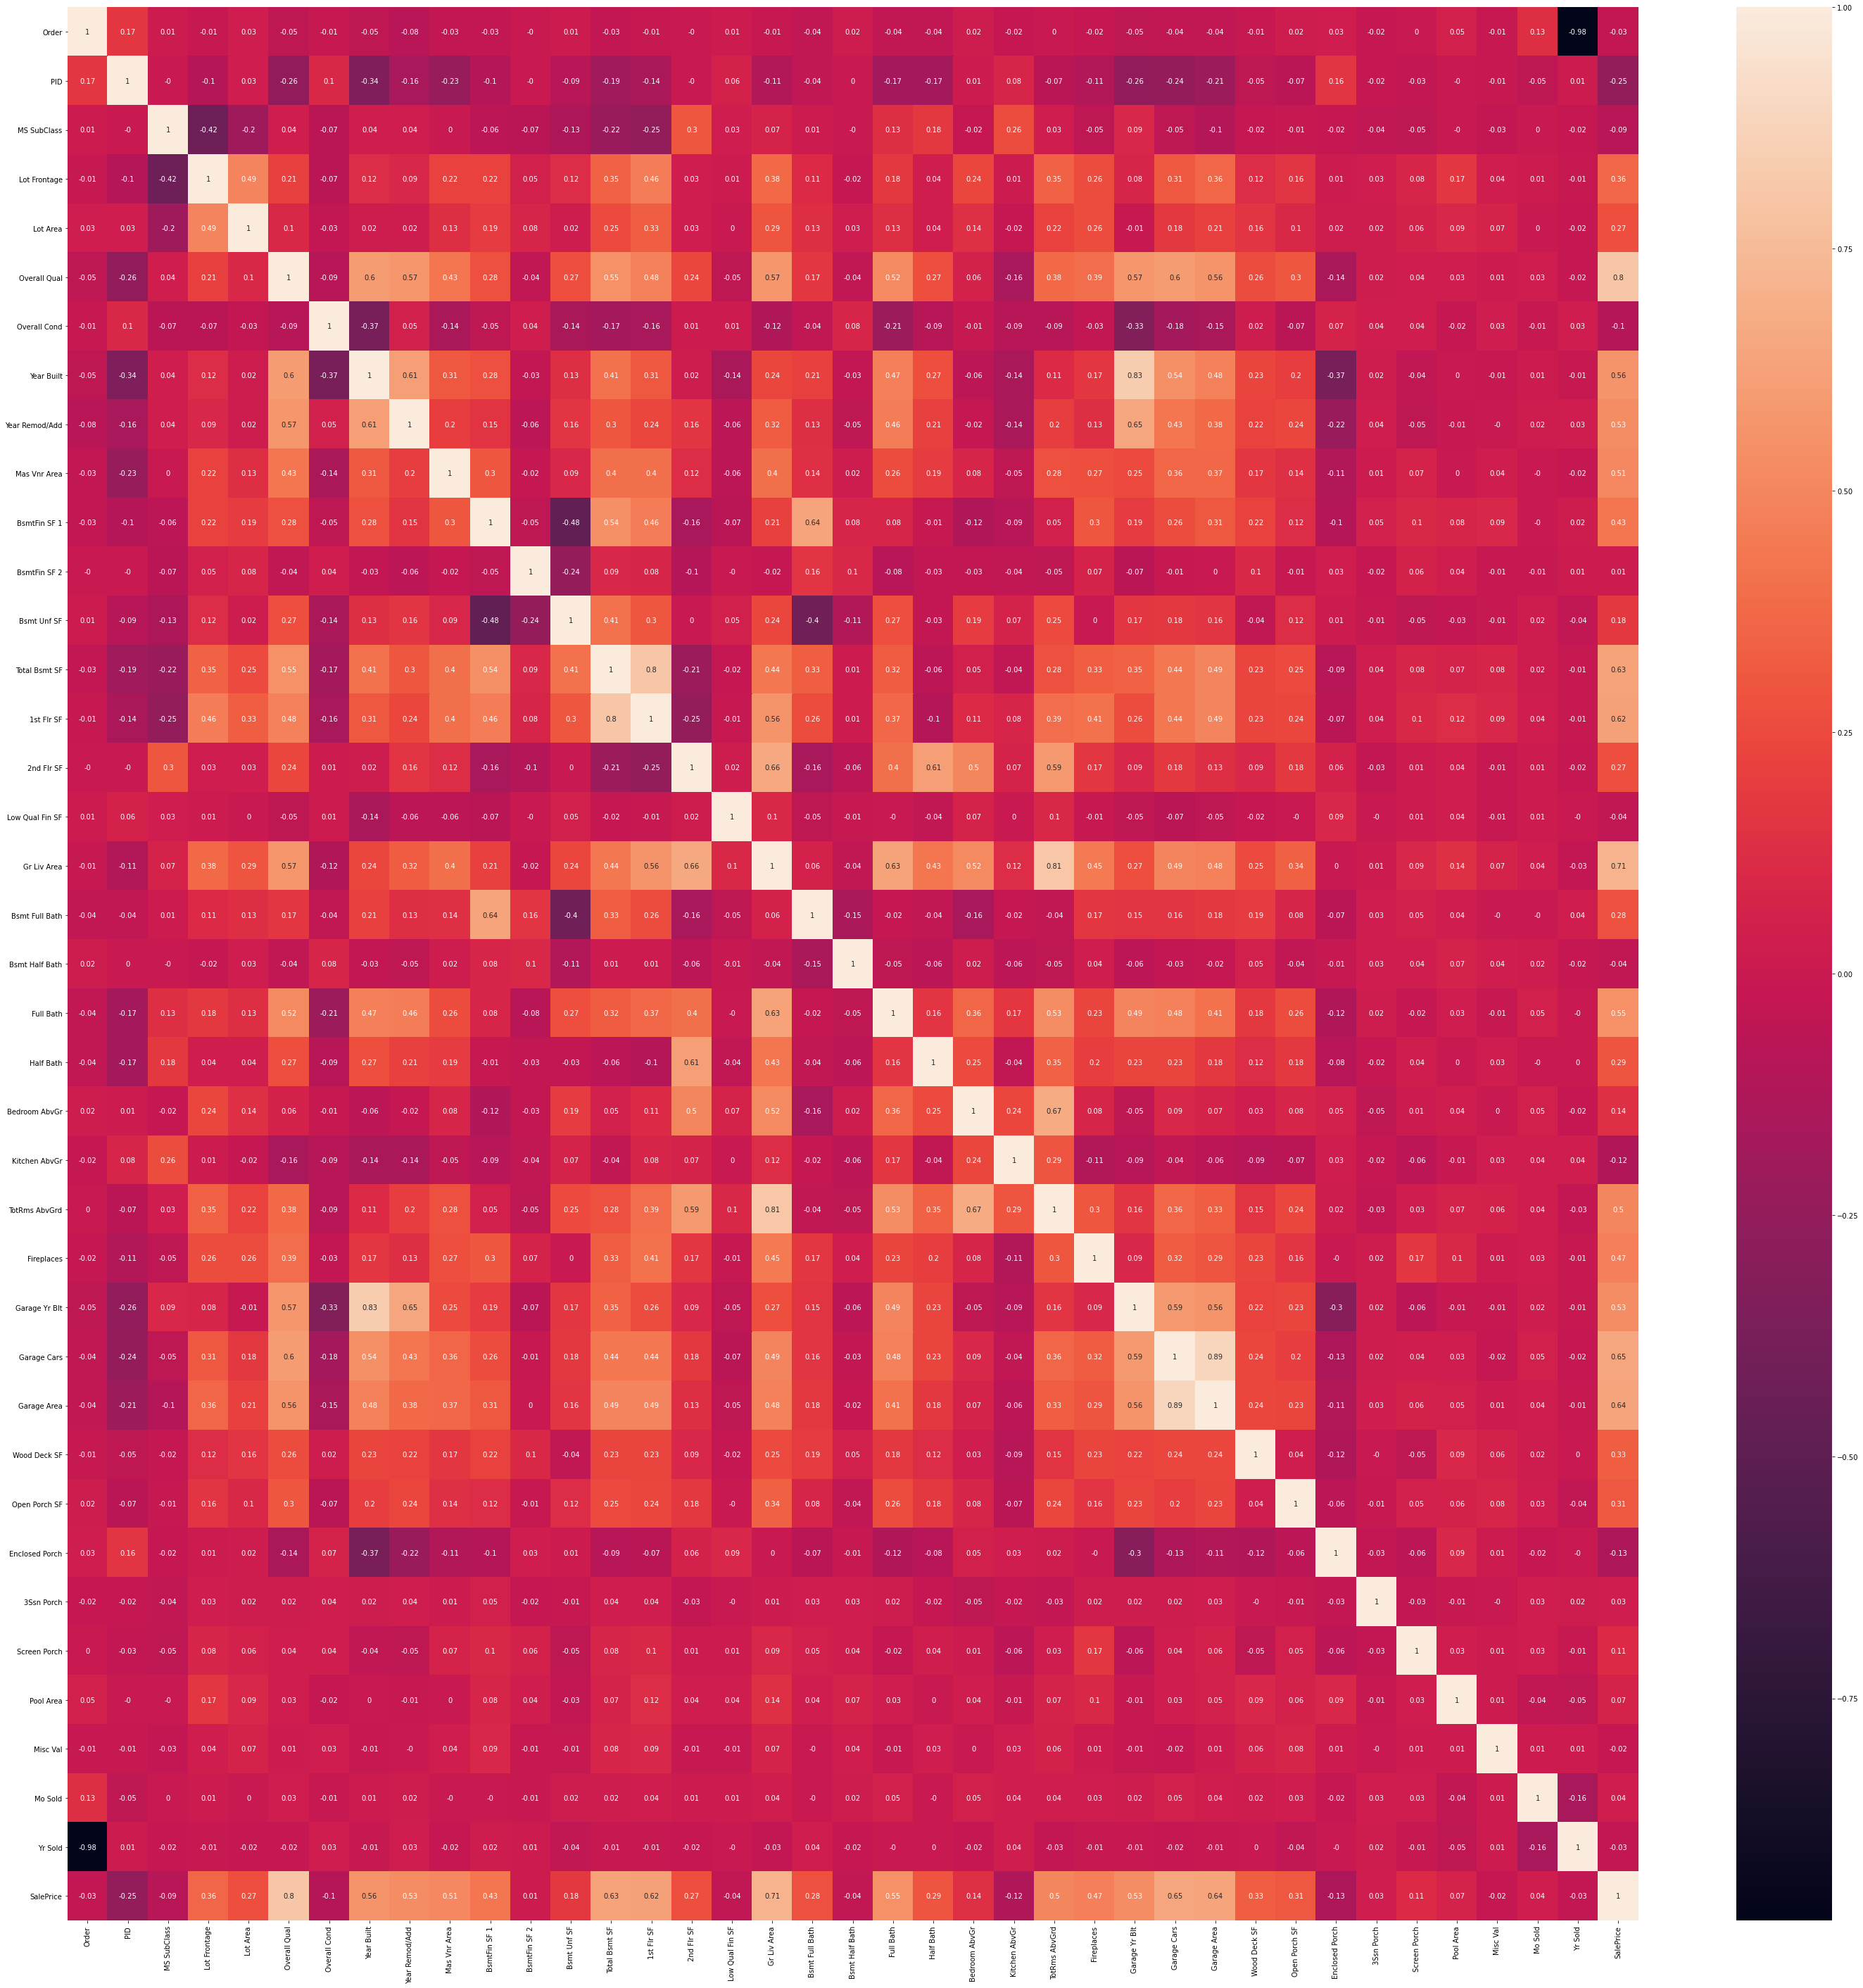

In [0]:
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

### Clean the Data

In [0]:
# Fill all NaN values for categorical variables
for variable in df.columns:
  if df[variable].dtype == object:
    df[variable].fillna(value='eme', inplace=True)

## Part 1 - Visualize Univariate Distributions of Continuous Variables


The list of continuous variables in the dataset is :

- **Lot Frontage** - Linear feet of street connected to property
- **Lot Area** - Lot size in square feet
- **Mas Vnr Area** - Masonry veneer area in square feet
- **BsmtFin SF 1** - Type 1 finished square feet
- **BsmtFin SF 2** - Type 2 finished square feet
- **Bsmt Unf SF** - Unfinished square feet of basement area
- **Total Bsmt SF** - Total square feet of basement area
- **1st Flr SF** - First Floor square feet
- **2nd Flr SF** - Second floor square feet
- **Low Qual Fin SF** - Low quality finished square feet (all floors)
- **Gr Liv Area** - Above grade (ground) living area square feet
- **Garage Area** - Size of garage in square feet
- **Wood Deck SF** - Wood deck area in square feet
- **Open Porch SF** - Open porch area in square feet
- **Enclosed Porch** - Enclosed porch area in square feet
- **3-Ssn Porch** - Three season porch area in square feet
- **Screen Porch** - Screen porch area in square feet
- **Pool Area** - Pool area in square feet
- **Misc Val** - $Value of miscellaneous feature
- **SalePrice** - Sale Price $$  

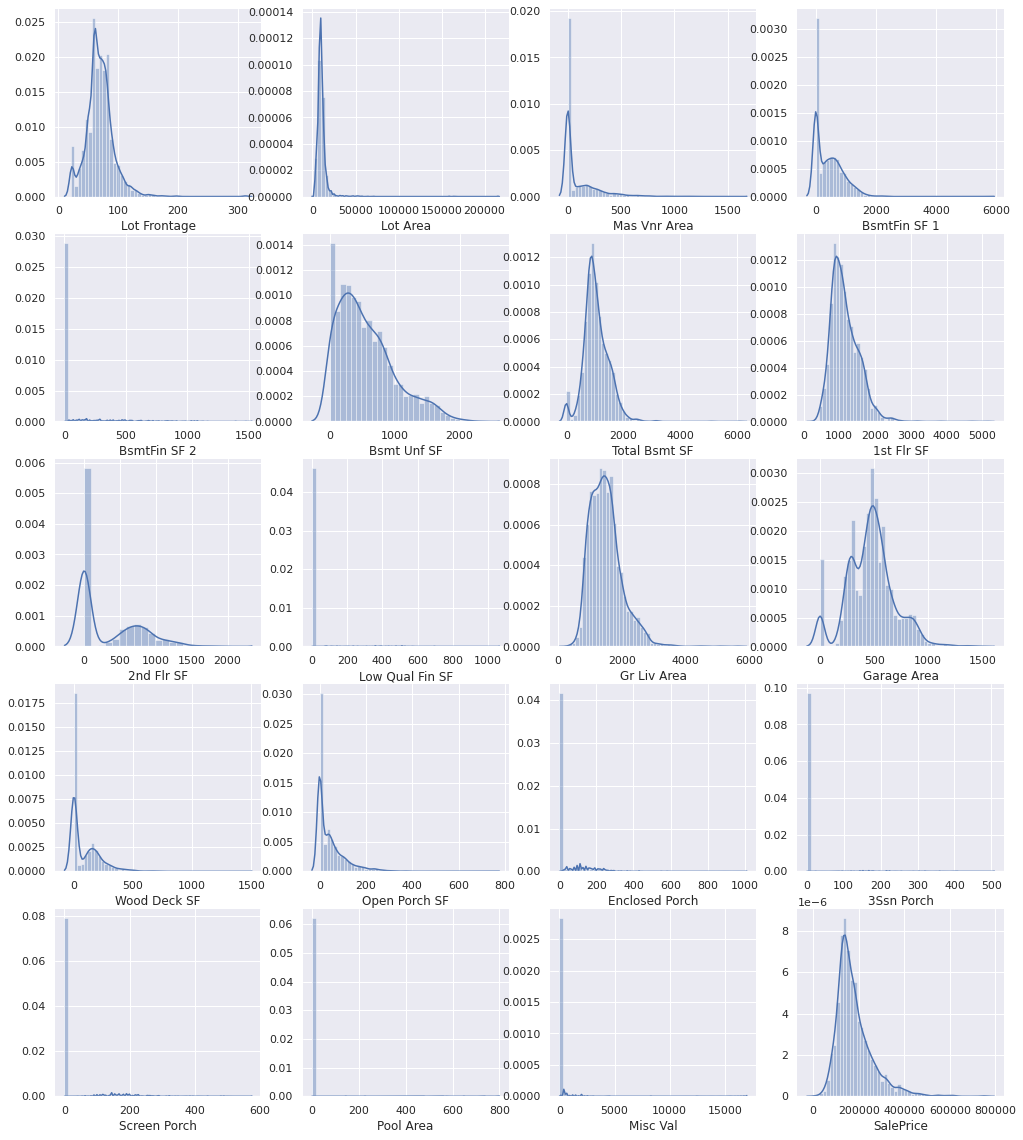

In [0]:
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
              'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
              '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
              'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
              'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']

# Set up the matplotlib figure
f, axes = plt.subplots(nrows=5, ncols=4, figsize=(17,20), sharex=False)
sns.despine(left=True)

sns.set(color_codes=True)

i = 0
j = 0

for variable in continuous:
  sns.distplot(df[variable], ax=axes[j,i%4])
  i += 1
  if i%4 == 0:
    j +=1

The following variables, as can be seen in the above univariate distributions, are highly unevenly distributed and left skewed. 

- **Bsmt Fin SF 2**
- **Misc Val**
- **Pool Area**
- **Screen Porch**
- **3Ssn Porch**
- **Low Qual Fin SF**

These six variables can be scalled to get a prediction out of the data. Also from these plots and the correlation matrix the **Lot Frontage**, **Total Bsmt SF**, **1st Flr SF**, **Gr Liv Area**, and **SalePrice** seem to have highly correlated plots and the former might be good predictors of the **SalePrice** variable.

## Part 2 - Visualize the dependency of the target on the continuous varabiles

### Visualization based on ScatterPlots 

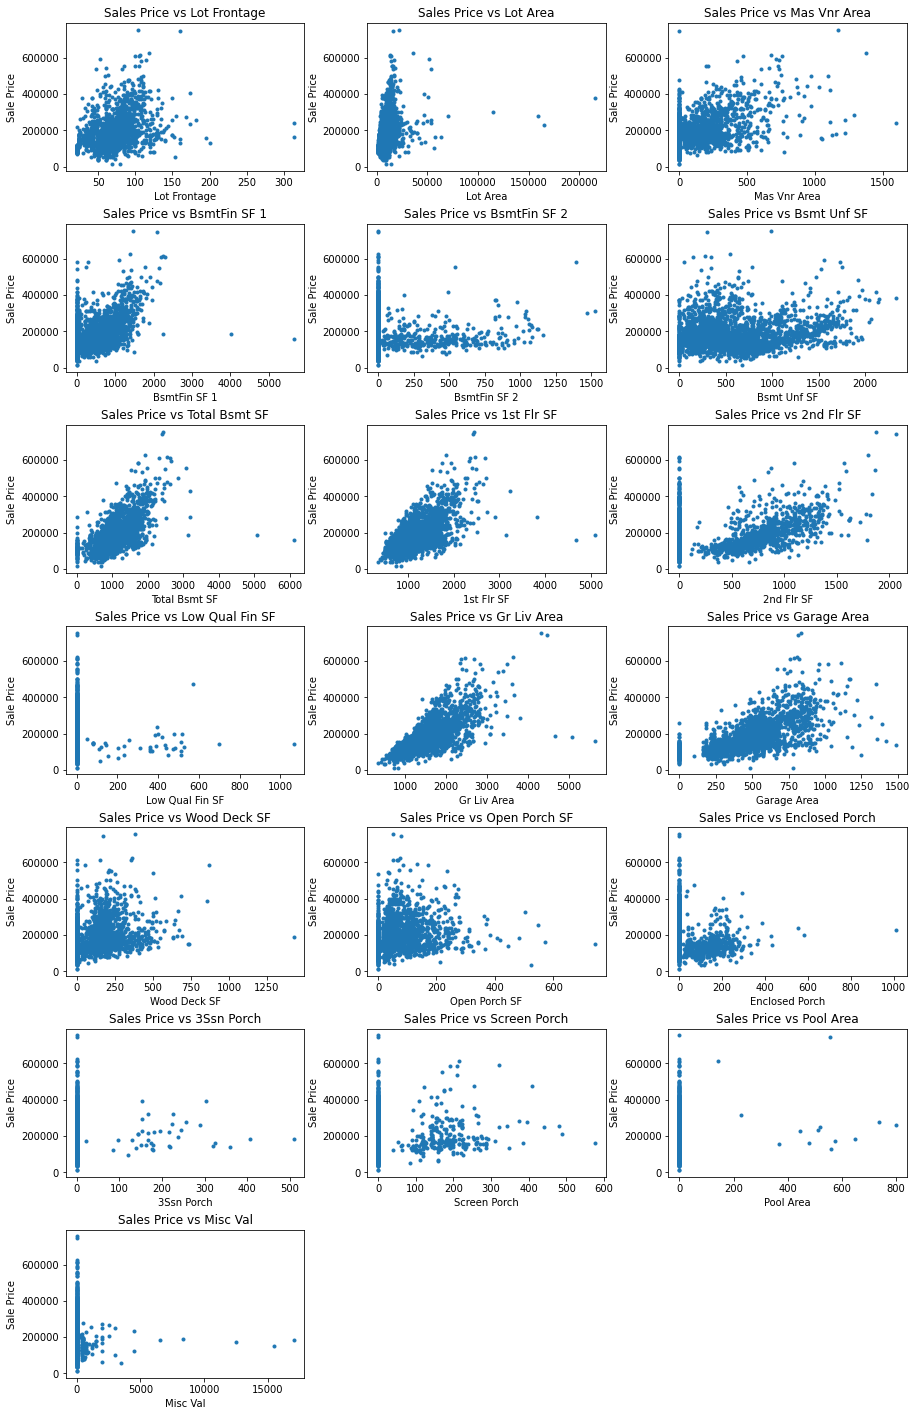

In [0]:
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
              'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
              '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
              'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
              'Screen Porch', 'Pool Area', 'Misc Val']

# Set up the matplotlib figure
f, axes = plt.subplots(nrows=7, ncols=3, figsize=(13,20), sharex=False)
f.tight_layout(pad=3.2)

i = 0
j = 0
for variable in continuous:
  axes[i,j%3].plot(df[variable], df['SalePrice'], '.')
  axes[i,j%3].set_ylabel('Sale Price')
  axes[i,j%3].set_xlabel(variable)
  axes[i,j%3].set_title('Sales Price vs ' + variable)
  j=j+1
  if j%3 == 0:
    i=i+1
f.delaxes(axes[6,2])
f.delaxes(axes[6,1])    

## Part 3 - Split Data to Train and Test sets

In [0]:
# Split into 80/20 split for training and testing
df_train, df_test = train_test_split(df, test_size=0.2)

### One-Hot Encode the Categorical Variables

The list of categorical variables in the dataset is:

- **PID (Nominal)** - Parcel identification number 
- **MS SubClass (Nominal)** - Identifies the type of dwelling involved in the sale.
- **MS Zoning (Nominal)** - Identifies the general zoning classification of the sale.
- **Street (Nominal)** - Type of road access to property
- **Alley (Nominal)** - Type of alley access to property
- **Lot Shape (Ordinal)** - General shape of property
- **Land Contour (Nominal)** - Flatness of the property
- **Utilities (Ordinal)** - Type of utilities available
- **Lot Config (Nominal)** - Lot configuration
- **Land Slope (Ordinal)** - Slope of property
- **Neighborhood (Nominal)** - Physical locations within Ames city limits (map available)
- **Condition 1 (Nominal)** - Proximity to various conditions
- **Condition 2 (Nominal)** - Proximity to various conditions (if more than one is present)
- **Bldg Type (Nominal)** - Type of dwelling
- **House Style (Nominal)** - Style of dwelling
- **Overall Qual (Ordinal)** - Rates the overall material and finish of the house
- **Overall Cond (Ordinal)** - Rates the overall condition of the house
- **Roof Style (Nominal)** - Type of roof
- **Roof Matl (Nominal)** - Roof material
- **Exterior 1 (Nominal)** - Exterior covering on house
- **Exterior 2 (Nominal)** - Exterior covering on house (if more than one material)
- **Mas Vnr Type (Nominal)** - Masonry veneer type
- **Exter Qual (Ordinal)** - Evaluates the quality of the material on the exterior 
- **Exter Cond (Ordinal)** - Evaluates the present condition of the material on the exterior
- **Foundation (Nominal)** - Type of foundation
- **Bsmt Qual (Ordinal)** - Evaluates the height of the basement
- **Bsmt Cond (Ordinal)** - Evaluates the general condition of the basement
- **Bsmt Exposure	(Ordinal)** - Refers to walkout or garden level walls
- **BsmtFin Type 1	(Ordinal)** - Rating of basement finished area
- **BsmtFinType 2	(Ordinal)** - Rating of basement finished area (if multiple types)
- **Heating	(Nominal)** - Type of heating
- **HeatingQC (Ordinal)** - Heating quality and condition
- **Central Air (Nominal)** - Central air conditioning
- **Electrical (Ordinal)** - Electrical system
- **KitchenQual (Ordinal)** - Kitchen quality
- **Functional (Ordinal)** - Home functionality (Assume typical unless deductions are warranted)
- **FireplaceQu (Ordinal)** - Fireplace quality
- **Garage Type (Nominal)** - Garage location
- **Garage Finish (Ordinal)** - Interior finish of the garage
- **Garage Qual (Ordinal)** - Garage quality
- **Garage Cond (Ordinal)** - Garage condition
- **Paved Drive (Ordinal)** - Paved driveway
- **Pool QC (Ordinal)** - Pool quality
- **Fence (Ordinal)** - Fence quality
- **Misc Feature (Nominal)** - Miscellaneous feature not covered in other categories
- **Sale Type (Nominal)** - Type of sale
- **Sale Condition (Nominal)** - Condition of sale

In [0]:
def encode_onehot(variable):
  encoder = OneHotEncoder(sparse=False)
  encoded_variable = encoder.fit_transform(df_train[[variable]])
  return encoded_variable

def display_r2(X):
  lr = LinearRegression()
  scores = cross_val_score(lr,
                           X,
                           df_train['SalePrice'],
                           scoring='r2')
  
  # Display average R^2 score with standard deviation
  print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

### Cross-validate each with a Linear Regression model

In [0]:
# Categorical variables in dataframe
categoricals = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley']

# Fill NaN values for categorical variables
#df_train = df_train.fillna(0)

# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  PID
Average R^2 score: -0.01447 (+/- 0.02747)


Displaying R2 for  MS SubClass
Average R^2 score: -48966216999649312505856.00000 (+/- 195864867998597250023424.00000)


Displaying R2 for  MS Zoning
Average R^2 score: -27225959123101511843840.00000 (+/- 108903836492406047375360.00000)


Displaying R2 for  Street
Average R^2 score: 0.00169 (+/- 0.00814)


Displaying R2 for  Alley
Average R^2 score: 0.01812 (+/- 0.01050)




In [0]:
categoricals = ['Lot Shape', 'Land Contour', 'Utilities', 'Lot Config']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Lot Shape
Average R^2 score: 0.08583 (+/- 0.03415)


Displaying R2 for  Land Contour
Average R^2 score: 0.03341 (+/- 0.07264)


Displaying R2 for  Utilities
Average R^2 score: -1335892707775131722711040.00000 (+/- 4932594291457668658757632.00000)


Displaying R2 for  Lot Config
Average R^2 score: 0.01370 (+/- 0.02670)




In [0]:
categoricals = ['Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Land Slope
Average R^2 score: 0.00023 (+/- 0.01668)


Displaying R2 for  Neighborhood
Average R^2 score: -521578145226601336406016.00000 (+/- 2086312580906405345624064.00000)


Displaying R2 for  Condition 1
Average R^2 score: 0.02541 (+/- 0.03539)


Displaying R2 for  Condition 2
Average R^2 score: -635701786820225521418240.00000 (+/- 1954285611635034782957568.00000)




In [0]:
categoricals = ['Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Bldg Type
Average R^2 score: 0.02561 (+/- 0.03201)


Displaying R2 for  House Style
Average R^2 score: 0.06835 (+/- 0.02504)


Displaying R2 for  Overall Qual
Average R^2 score: 0.67737 (+/- 0.07186)


Displaying R2 for  Overall Cond
Average R^2 score: 0.12821 (+/- 0.02429)




In [0]:
categoricals = ['Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Roof Style
Average R^2 score: 0.07816 (+/- 0.05090)


Displaying R2 for  Roof Matl
Average R^2 score: -8432942294969216749535232.00000 (+/- 30120783811934244697014272.00000)


Displaying R2 for  Exterior 1st
Average R^2 score: -28163221124069239816192.00000 (+/- 98242697396580331290624.00000)


Displaying R2 for  Exterior 2nd
Average R^2 score: -67503702448240760717312.00000 (+/- 181717683023373181911040.00000)




In [0]:
categoricals = ['Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Mas Vnr Type
Average R^2 score: 0.18458 (+/- 0.06278)


Displaying R2 for  Exter Qual
Average R^2 score: 0.49039 (+/- 0.09940)


Displaying R2 for  Exter Cond
Average R^2 score: 0.02039 (+/- 0.01492)


Displaying R2 for  Foundation
Average R^2 score: 0.27439 (+/- 0.05565)




In [0]:
categoricals = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Bsmt Qual
Average R^2 score: 0.48909 (+/- 0.05581)


Displaying R2 for  Bsmt Cond
Average R^2 score: 0.04383 (+/- 0.00684)


Displaying R2 for  Bsmt Exposure
Average R^2 score: 0.18304 (+/- 0.04345)


Displaying R2 for  BsmtFin Type 1
Average R^2 score: 0.21737 (+/- 0.07834)




In [0]:
categoricals = ['BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  BsmtFin Type 2
Average R^2 score: 0.02065 (+/- 0.02148)


Displaying R2 for  Heating
Average R^2 score: -785423502846127144697856.00000 (+/- 3141694011384508578791424.00000)


Displaying R2 for  Heating QC
Average R^2 score: 0.20505 (+/- 0.05180)


Displaying R2 for  Central Air
Average R^2 score: 0.06552 (+/- 0.02885)




In [0]:
categoricals = ['Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Electrical
Average R^2 score: -47849223133267685801984.00000 (+/- 122352064254160085712896.00000)


Displaying R2 for  Kitchen Qual
Average R^2 score: -1545160875677200416768.00000 (+/- 6180643502708801667072.00000)


Displaying R2 for  Functional
Average R^2 score: 0.01137 (+/- 0.01632)


Displaying R2 for  Fireplace Qu
Average R^2 score: 0.28729 (+/- 0.09624)




In [0]:
categoricals = ['Garage Type', 'Garage Finish', 'Garage Cond', 'Paved Drive']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Garage Type
Average R^2 score: 0.23415 (+/- 0.03286)


Displaying R2 for  Garage Finish
Average R^2 score: 0.30781 (+/- 0.02401)


Displaying R2 for  Garage Cond
Average R^2 score: -2765625446041019033321472.00000 (+/- 11062501784164073985802240.00000)


Displaying R2 for  Paved Drive
Average R^2 score: 0.07258 (+/- 0.01375)




In [0]:
categoricals = ['Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']
# Iterate through categorical variables
for i in categoricals:
  print("Displaying R2 for ", i )
  display_r2(encode_onehot(i))
  print("\n")

Displaying R2 for  Pool QC
Average R^2 score: -81354181823639180017664.00000 (+/- 251353410394154690674688.00000)


Displaying R2 for  Fence
Average R^2 score: 0.03435 (+/- 0.02685)


Displaying R2 for  Misc Feature
Average R^2 score: -11091780385433777602560.00000 (+/- 26847801140542403772416.00000)


Displaying R2 for  Sale Type
Average R^2 score: -4914105321395137282048.00000 (+/- 19656421285580549128192.00000)


Displaying R2 for  Sale Condition
Average R^2 score: 0.13682 (+/- 0.05508)




### Visualize categorical variables compared with target variable

In order of best $R^2$ score obtained, the categorical values will be displayed.

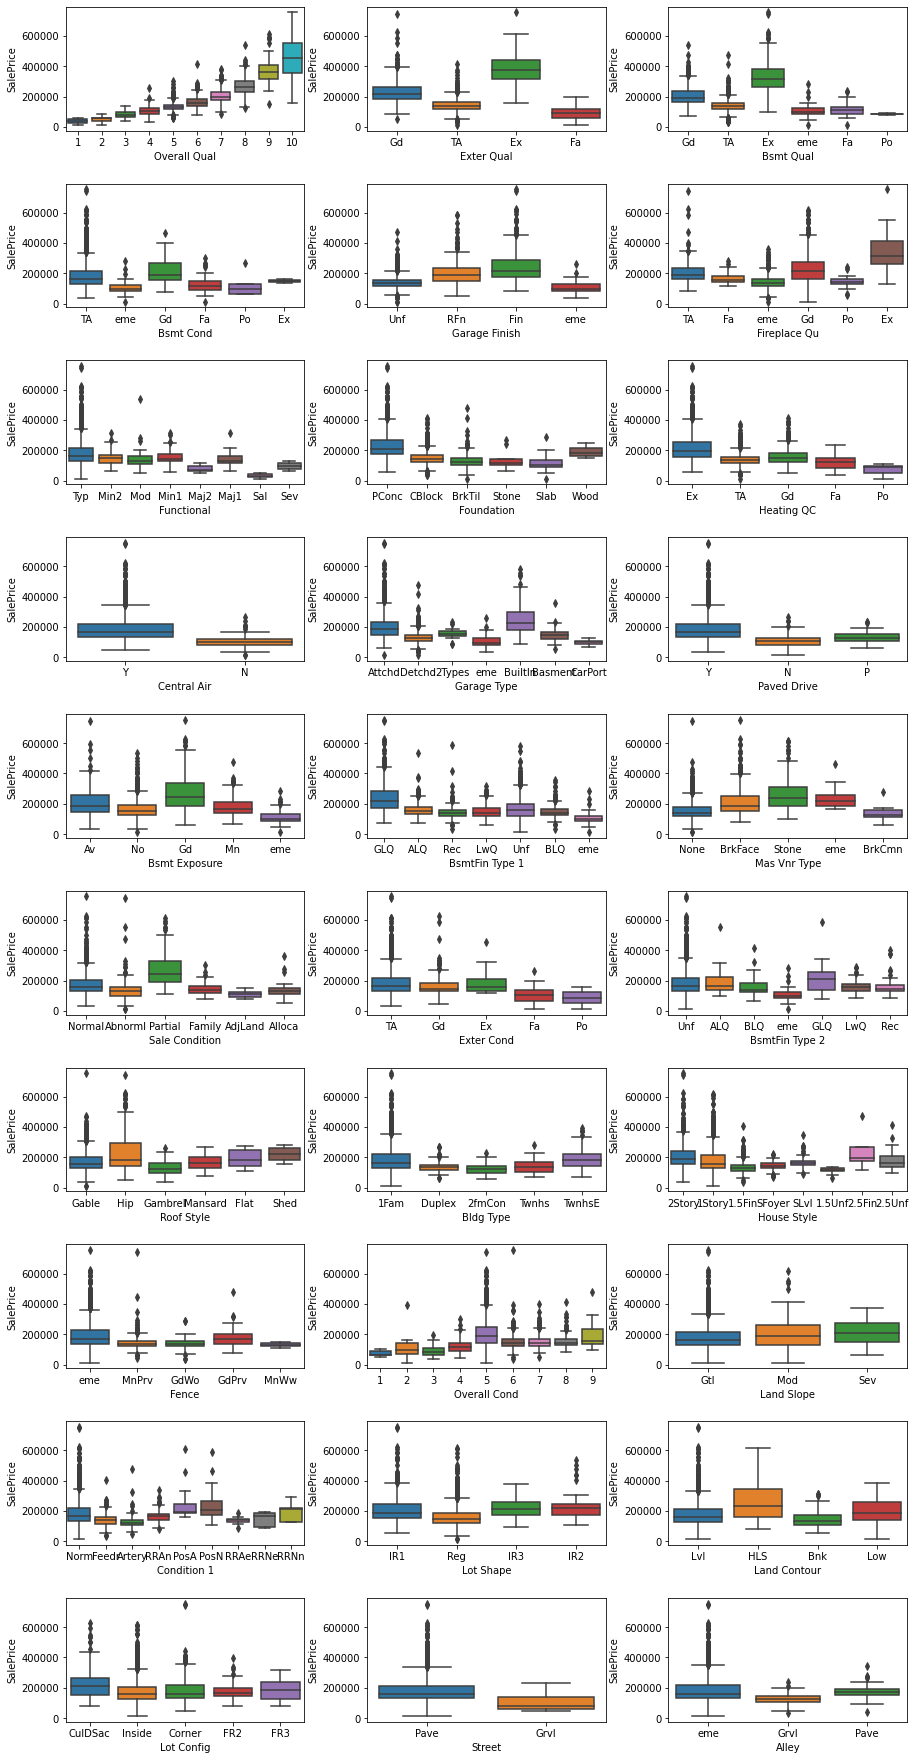

In [0]:
cattoboxs = ['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Bsmt Cond', 
                    'Garage Finish', 'Fireplace Qu', 'Functional', 'Foundation', 
                    'Heating QC', 'Central Air', 'Garage Type', 'Paved Drive', 
                    'Bsmt Exposure', 'BsmtFin Type 1', 'Mas Vnr Type', 
                    'Sale Condition', 'Exter Cond', 'BsmtFin Type 2', 'Roof Style', 
                    'Bldg Type', 'House Style', 'Fence', 'Overall Cond',
                    'Land Slope', 'Condition 1', 'Lot Shape', 'Land Contour',
                    'Lot Config', 'Street', 'Alley']

# Set up the matplotlib figure
f, axes = plt.subplots(nrows=10, ncols=3, figsize=(13,25), sharex=False)
f.tight_layout(pad=3.2)

i = 0
j = 0

for variable in cattoboxs:
  sns.boxplot(x=variable, y='SalePrice', data=df_train, ax=axes[i, j%3])
  j = j + 1
  if j % 3 == 0:
    i = i + 1

The following categorical variables were not displayed due to extremely low $R^2$ scores:

- **PID**
- **MS SubClass**
- **MS Zoning**
- **Utilities** 
- **Neighborhood**
- **Condition 2**
- **Roof Matl**
- **Exterior 1st**
- **Exterior 2nd**
- **Heating** 
- **Electrical** 
- **Kitchen Qual**
- **Garage Cond**
- **Pool QC**
- **Misc Feature**
- **Sale Type**

## Part 4

### Use ColumnTansformer and pipeline to encode Categorical Variables

In [0]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.impute import SimpleImputer

In [0]:
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
              'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
              '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
              'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
              'Screen Porch', 'Pool Area', 'Misc Val']
#categorical = 
preprocessing = make_column_transformer(
    (SimpleImputer(), continuous),
    (OneHotEncoder(), cattoboxs),
)

model1 = make_pipeline(preprocessing, LinearRegression())
model2 = make_pipeline(preprocessing, Lasso())
model3 = make_pipeline(preprocessing, Ridge())
model4 = make_pipeline(preprocessing, ElasticNet())

features_to_drop = ['SalePrice']

X = df_train.drop(features_to_drop, axis=1)
y = df_train['SalePrice']

print("Displaying R2 for Linear Regression" )
scores = cross_val_score(model1, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))
print("Displaying R2 for Lasso Regression" )
scores = cross_val_score(model2, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))
print("Displaying R2 for Ridge Regression" )
scores = cross_val_score(model3, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))
print("Displaying R2 for ElasticNet Regression" )
scores = cross_val_score(model4, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

Displaying R2 for Linear Regression
Average R^2 score: 0.82245 (+/- 0.12180)
Displaying R2 for Lasso Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340989775074.0882, tolerance: 1223115989.2400126
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237376275841.72656, tolerance: 1170824786.1683912
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729164904976.3411, tolerance: 1287297839.1565435
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not 

Average R^2 score: 0.82178 (+/- 0.12141)
Displaying R2 for Ridge Regression
Average R^2 score: 0.67358 (+/- 0.18981)
Displaying R2 for ElasticNet Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1150980796452.0493, tolerance: 1223115989.2400126
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1360339965358.5684, tolerance: 1170824786.1683912
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367733921301.8044, tolerance: 1287297839.1565435
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did no

Average R^2 score: 0.75543 (+/- 0.16527)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1369616587412.792, tolerance: 1160410230.1463015
  max_iter, tol, rng, random, positive)


### Analyze Continuous Variables with StandardScaling in Pipeline

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
preprocessing = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), continuous),
    (OneHotEncoder(handle_unknown='ignore'), cattoboxs)
)

model1 = make_pipeline(preprocessing, LinearRegression())
model2 = make_pipeline(preprocessing, Lasso())
model3 = make_pipeline(preprocessing, Ridge())
model4 = make_pipeline(preprocessing, ElasticNet())

features_to_drop = ['SalePrice']

X = df_train.drop(features_to_drop, axis=1)
y = df_train['SalePrice']

print("Displaying R2 for Linear Regression" )
scores = cross_val_score(model1, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))
print("Displaying R2 for Lasso Regression" )
scores = cross_val_score(model2, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))
print("Displaying R2 for Ridge Regression" )
scores = cross_val_score(model3, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))
print("Displaying R2 for ElasticNet Regression" )
scores = cross_val_score(model4, X, y, scoring='r2')
print("Average R^2 score: %0.5f (+/- %0.5f)" % (scores.mean(),
                                                  scores.std()*2))

Displaying R2 for Linear Regression
Average R^2 score: 0.82140 (+/- 0.12122)
Displaying R2 for Lasso Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6731160567.180786, tolerance: 1223115989.2400126
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237476706339.266, tolerance: 1170824786.1683912
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8546041855.467529, tolerance: 1287297839.1565435
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not co

Average R^2 score: 0.82179 (+/- 0.12140)
Displaying R2 for Ridge Regression
Average R^2 score: 0.82372 (+/- 0.12153)
Displaying R2 for ElasticNet Regression
Average R^2 score: 0.77160 (+/- 0.10127)


### Dicussion

Linear Regression and Lasso Regression had no change caused by scaling the continuous variables. The average $R^2$ value for both models stayed the same with no change for the standard deviation either. ElasticNet had an increase for it's average $R^2$ of about $0.02$ and its standard deviation was reduced by $0.06$. Ridge regression had the the largest increase increase in average $R^2$ score of around $0.2$ with a decrease of $0.06$ in it's standard deviation.  

## Part 5

### Tune with GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid2 = {'lasso__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 8, 16, 32, 128]}
param_grid3 = {'ridge__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 8, 16, 32, 128]}
param_grid4 = {'elasticnet__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 8, 16, 32, 128]}

lassotest = GridSearchCV(model2, param_grid2, scoring='r2')
ridgetest = GridSearchCV(model3, param_grid3, scoring='r2')
elasticnettest = GridSearchCV(model4, param_grid4, scoring='r2')

lassotest.fit(X, y)
ridgetest.fit(X, y)
elasticnettest.fit(X, y)

#### Best Estimator for Lasso

In [0]:
lassotest.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                               

#### Best Estimator for Ridge

In [0]:
ridgetest.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                               

#### Best Estimator for ElasticNet

In [0]:
elasticnettest.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                               

### Dependence of Validation Score on Parameters

Text(650.5602941176471, 0.5, 'Average R2 Score')

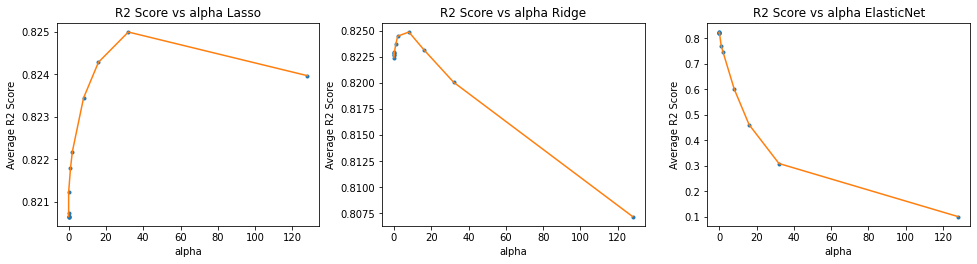

In [0]:
gridlasso = pd.DataFrame(lassotest.cv_results_)
gridridge = pd.DataFrame(ridgetest.cv_results_)
gridelasticnet = pd.DataFrame(elasticnettest.cv_results_)
x = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 8, 16, 32, 128]
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4), sharex=False)
f.tight_layout(pad=3.2)

axes[0].plot(x,gridlasso['mean_test_score'], '.', x, gridlasso['mean_test_score'])
axes[0].set_title('R2 Score vs alpha Lasso')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('Average R2 Score')
axes[1].plot(x,gridridge['mean_test_score'], '.', x, gridridge['mean_test_score'])
axes[1].set_title('R2 Score vs alpha Ridge')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('Average R2 Score')
axes[2].plot(x,gridelasticnet['mean_test_score'], '.', x, gridelasticnet['mean_test_score'])
axes[2].set_title('R2 Score vs alpha ElasticNet')
axes[2].set_xlabel('alpha')
axes[2].set_ylabel('Average R2 Score')

## Part 6

### Discussion of coefficients of models

The best parameters from the three models are associated with the largest $R^2$ score. For Lasso Regression the mean test score was associated with the $\alpha$ of $32$, corresponding to the image above. The $\alpha$ value associated with the largest $R^2$ value was $8$. 

In [0]:
print("Best alpha parameter for Lasso:",lassotest.best_params_)
print("Best alpha parameter for Ridge:",ridgetest.best_params_)
print("Best alpha parameter for ElasticNet:",elasticnettest.best_params_)

Best alpha parameter for Lasso: {'lasso__alpha': 32}
Best alpha parameter for Ridge: {'ridge__alpha': 8}
Best alpha parameter for ElasticNet: {'elasticnet__alpha': 0.01}


### Evaluate model performance on test set

In [0]:
# Import the SKLearn metric libraries 
from sklearn.metrics import r2_score

In [0]:
Xtest = df_test.drop(['SalePrice'], axis=1)
ytest = df_test['SalePrice']
#lassotest.pr
ypred = lassotest.best_estimator_.predict(Xtest)
ypred2 = ridgetest.best_estimator_.predict(Xtest)
ypred3 = elasticnettest.best_estimator_.predict(Xtest)

print("Lasso R2 Score:", r2_score(ytest, ypred))
print("Ridge R2 Score:", r2_score(ytest, ypred2))
print("ElasticNet R2 Score:", r2_score(ytest, ypred3))

Lasso R2 Score: 0.91185752685715
Ridge R2 Score: 0.9134007839114469
ElasticNet R2 Score: 0.9141791441581449


The $R^2$ statistic for all three models (Lasso, Ridge, ElasticNet) all are above 0.91. Using this optimized model obtained by GridSearchCV, the all three models were able to increase about 0.1 to their $R^2$ statistic by tuning the $\alpha$ parameter.

In [0]:
!jupyter nbconvert --to PDF Midterm.ipynb

[NbConvertApp] Converting notebook Midterm.ipynb to PDF
[NbConvertApp] Support files will be in Midterm_files/
[NbConvertApp] Making directory ./Midterm_files
[NbConvertApp] Making directory ./Midterm_files
[NbConvertApp] Making directory ./Midterm_files
[NbConvertApp] Making directory ./Midterm_files
[NbConvertApp] Making directory ./Midterm_files
[NbConvertApp] Writing 98864 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 987464 bytes to Midterm.pdf
